## NAME: Subodh Dharmadhikari

# LendingClub

LendingClub is a peer-to-peer lending company launched by Facebook in 2006, situated in San Francisco, California. It offer loan trading on a secondary market. It enables borrowers to create unsecured personal loans between <span>&#36;</span>1,000 and <span>&#36;</span>40,000. The standard loan period is three years. LendingClub makes money by charging borrowers an origination fee and investors a service fee. <a href="https://en.wikipedia.org/wiki/LendingClub">Wikipedia<a/> 
<br><br><br>

# Problem Statement 

The data set contains complete loan data for all loans issued through the 2007-2015, including the current loan status and latest payment information. 
The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. 
Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others.
See the attached Data Set Section in this assignment for specifics to be used for Problem set.


1. You are required to show your capability by the following
      <br>a. Articulate in a structured manner the approach taken
      <br>b. Must explain this clearly (use whiteboard model | simple text pad based notes)
<br><br>
2. Demonstrate the understanding of the provided data set aspects
     <br>a. Feature engineering
     <br>b. Data Model for building the Classification (to Approve the loan request) 
<br><br>
3. Model must be built on the data (Loan Data 2007-2011 | Declined 2007-12)) for the loan approved and declined loans
<br><br>
4. The model must be trained and tested with a 10-fold CV 
     <br>a. Share and explain the model accuracy 
<br><br>
5. Once the model has been trained it must be tested against data from  2008 Q1 to Q4 
     <br>a. Share and explain the model accuracy
<br><br>
Project submission Deadline by students of SICSR to NutaNXT: 06 PM on 20th June 2019 


Submission to be done on <u>sham.w@nutanxt.com</u>

## <br><br>Imports

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.style.use('seaborn-white')

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict # 10-Fold Cross Validation
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.neighbors import KNeighborsClassifier # K Nearest Neighbour
from sklearn.ensemble import RandomForestClassifier, VotingClassifier # Ensemble  

import datetime as dt 
import sys, matplotlib, warnings, math, sklearn
warnings.filterwarnings("ignore")

# Libraries versions 
print("Numpy : " + np.__version__)
print("Pandas : " + pd.__version__)
print("Seaborn : " + sns.__version__) 
print("Matplotlib : " + matplotlib.__version__)
print("SkLearn : " + sklearn.__version__)
print("Python : " + sys.version)

Numpy : 1.16.2
Pandas : 0.24.1
Seaborn : 0.8.1
Matplotlib : 3.0.2
SkLearn : 0.20.2
Python : 3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 01:22:34) 
[GCC 7.3.0]


### <br><br>Loading the datasets

In [2]:
loanstats = './dataset/LoanStats3a.csv/LoanStats3a.csv'

try:
    loan_df = pd.read_csv(loanstats, sep=',', encoding = 'ISO-8859-1', skiprows= 1, skipinitialspace=True)
except Exception as e:
    print(e)

### <br><br> Removing unnecessery rows and columns after visualizing loan dataset 

In [3]:
loan_df[39786:39787]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
39786,Loans that do not meet the credit policy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
loan_df.tail(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
42536,Total amount funded in policy code 1: 460296150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42537,Total amount funded in policy code 2: 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Dropping the specific indices which contain inapropriate data  
loan_df.drop(loan_df.index[39786],inplace=True)
loan_df.drop(loan_df.tail(2).index,inplace=True)

In [6]:
# Getting the percentage of NA values 
pd.set_option('display.max.rows', len(loan_df.columns))
print(loan_df.shape)
print((loan_df.isnull().sum() / loan_df.shape[0] * 100))

(42535, 144)
id                                            100.000000
member_id                                     100.000000
loan_amnt                                       0.000000
funded_amnt                                     0.000000
funded_amnt_inv                                 0.000000
term                                            0.000000
int_rate                                        0.000000
installment                                     0.000000
grade                                           0.000000
sub_grade                                       0.000000
emp_title                                       6.173739
emp_length                                      2.614318
home_ownership                                  0.000000
annual_inc                                      0.009404
verification_status                             0.000000
issue_d                                         0.000000
loan_status                                     0.000000
pymnt_plan        

In [7]:
# Removing NA columns 
def get_nan_cols(df, nan_percent=0.8):
    threshold = len(df.index) * nan_percent
    return [c for c in df.columns if sum(df[c].isnull()) >= threshold]

loan_df.drop(get_nan_cols(loan_df, 0.9), axis=1, inplace= True)

# Removing un-necessary columns after visualization of data 
cols = ["hardship_flag", "application_type", "policy_code", "out_prncp_inv", "out_prncp", "initial_list_status",
        "title", "pymnt_plan", "emp_title","desc", "chargeoff_within_12_mths", 
        "collections_12_mths_ex_med"] # zip_code

loan_df.drop(cols, axis=1, inplace= True)

In [8]:
pd.set_option('display.max.rows', len(loan_df.columns))
print((loan_df.isnull().sum() / loan_df.shape[0] * 100))

loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_length                  2.614318
home_ownership              0.000000
annual_inc                  0.009404
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
purpose                     0.000000
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.068179
earliest_cr_line            0.068179
inq_last_6mths              0.068179
mths_since_last_delinq     63.303162
open_acc                    0.068179
pub_rec                     0.068179
revol_bal                   0.000000
revol_util                  0.211590
total_acc                   0.068179
t

In [9]:
# loan_df.describe()
pd.set_option('display.max.columns', len(loan_df.columns))
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,credit_card,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,3.0,0.0,13648.0,83.7%,9.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,Dec-2018,0.0,0.0,0.0,0.0,N
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,car,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,3.0,0.0,1687.0,9.4%,4.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,Oct-2016,0.0,0.0,0.0,0.0,N
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,small_business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,2.0,0.0,2956.0,98.5%,10.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-2014,649.91,Jun-2017,0.0,0.0,0.0,0.0,N
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,other,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,10.0,0.0,5598.0,21%,37.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-2015,357.48,Apr-2016,0.0,0.0,0.0,0.0,N
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-2011,Fully Paid,other,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,15.0,0.0,27783.0,53.9%,38.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,Jan-2017,67.30,Apr-2018,0.0,0.0,0.0,0.0,N


# <br><br>Exploratory Data Analysis

<b>NOTE: </b>This has been done after data visualization  

There are four categories for 'loan_status' and the data for the two which are "Does not meet the credit policy" are very less in numbers. It can be renamed to two categories, i.e. "Fully Paid" and "Charged Off". This will improve the model accuracy. Creating separate column for "Does Not Meet Credit Policy".

In [10]:
def dnmcpStatus(x):
    if x in ['Fully Paid','Charged Off']:
        return 0 
    else :
        return 1

loan_df['dnmcp'] = loan_df.loan_status.apply(lambda x: dnmcpStatus(x))

In [11]:
try:
    # ["term"]
    loan_df['term'] = loan_df['term'].str.replace('months','')
    loan_df['term'] = loan_df['term'].str.replace('36','3')
    loan_df['term'] = loan_df['term'].str.replace('60','5')
    loan_df['term'] = pd.to_numeric(loan_df['term']) 
    
    # ["int_rate"]
    loan_df['int_rate'] = loan_df['int_rate'].str.replace('%','')
    loan_df['int_rate'] = pd.to_numeric(loan_df['int_rate']) 
    
    # ["revol_util"]
    loan_df['revol_util'] = loan_df['revol_util'].str.replace('%','')
    loan_df['revol_util'] = pd.to_numeric(loan_df['revol_util']) 
    
    # ["loan_status"]
    loan_df["loan_status"]=loan_df["loan_status"].str.replace("Does not meet the credit policy. Status:Fully Paid",
                                                                "Fully Paid")
    loan_df["loan_status"]=loan_df["loan_status"].str.replace("Does not meet the credit policy. Status:Charged Off",
                                                                "Charged Off")
    
    # ["emp_length"]
    loan_df["emp_length"] = loan_df["emp_length"].str.replace('< 1 year','0')
    
    # ["home_ownership"]
    loan_df["home_ownership"] = loan_df["home_ownership"].replace(['ANY', 'NONE','OTHER'], 'RENT')
    
    
    # ['purpose']
    loan_df['purpose'] = loan_df['purpose'].str.replace('renewable_energy', 'other')

    
    # ["issue_d", "earliest_cr_line", "last_pymnt_d", "last_credit_pull_d"]
    loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'])
    loan_df['last_pymnt_d'] = pd.to_datetime(loan_df['last_pymnt_d'])
    loan_df['earliest_cr_line'] = pd.to_datetime(loan_df['earliest_cr_line'])
    loan_df['last_credit_pull_d'] = pd.to_datetime(loan_df['last_credit_pull_d'])
    
     # ['issue_yr']
    loan_df['issue_yr'] = loan_df['issue_d'].dt.year
    
    # ['issue_month']
    loan_df['issue_month'] = loan_df['issue_d'].dt.month_name()    

    # ['issue_qtr']
    loan_df["issue_qtr"] = loan_df["issue_d"].dt.quarter
except Exception as e:
    print(e)

### Replacing NA values for some columns instead of removing

<b>NOTE:</b> Instead of filling, dropping of the NAs can also be done

In [12]:
try:
    loan_df['last_credit_pull_d'].fillna(method='ffill', inplace=True)
    loan_df['earliest_cr_line'].fillna(method='ffill', inplace=True)
    loan_df['last_pymnt_d'].fillna(method='ffill', inplace=True)

    loan_df["revol_util"].fillna(loan_df["revol_util"].mean(), inplace=True)
    loan_df["open_acc"].fillna(int(loan_df['open_acc'].mean()), inplace=True)
    loan_df["annual_inc"].fillna(round(loan_df["annual_inc"].mean(),2), inplace=True)
    loan_df["inq_last_6mths"].fillna(math.ceil(loan_df["inq_last_6mths"].mean()), inplace=True)
    loan_df["total_acc"].fillna(math.floor(loan_df["total_acc"].mean()), inplace=True)
    loan_df["pub_rec_bankruptcies"].fillna(math.ceil(loan_df["pub_rec_bankruptcies"].mean()), inplace=True)
    
    loan_df['emp_length'].fillna('0', inplace=True)
    
    loan_df['tax_liens'].fillna(0,inplace=True)
    loan_df['pub_rec_bankruptcies'].fillna(0,inplace=True)
    loan_df['delinq_amnt'].fillna(0, inplace=True)
    loan_df['acc_now_delinq'].fillna(0, inplace=True)
    loan_df['delinq_2yrs'].fillna(0, inplace=True)
    loan_df['pub_rec'].fillna(0, inplace=True)
except Exception as e:
    print(e)

In [13]:
# Separating 2008 data for testing 
test_2008 = loan_df[loan_df.issue_yr == 2008]
loan_df = loan_df[loan_df.issue_yr != 2008]

# <br><br><br>Visualization & Outliers Removal

<b>NOTE: </b>Data preprocessing is done after the visualization of data on various columns

In [14]:
title_font, xlabel_font, ylabel_font = 20, 12, 12  
colors=['lightcoral','yellowgreen', 'gold', 'skyblue','red','cyan']

## <br>Univariate Analysis 

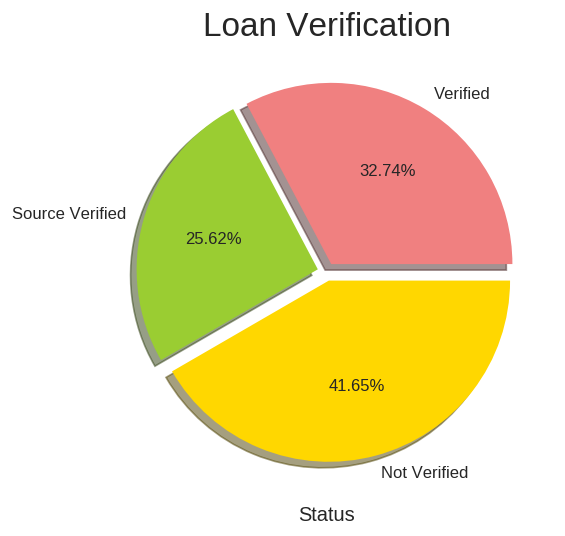

In [15]:
# ['verification_status']

verification_status = [(loan_df['verification_status']=='Verified').sum(),
                      (loan_df['verification_status']=='Source Verified').sum(),
                      (loan_df['verification_status']=='Not Verified').sum()]

plt.figure(figsize=(5,5),dpi=120)
plt.pie(verification_status, labels = ('Verified','Source Verified', 'Not Verified'), 
        explode = (0.05, 0.05, 0.05), colors = colors[0:3],shadow=True,startangle = 360, autopct='%1.2f%%')
plt.title("Loan Verification", fontsize = title_font)
plt.xlabel('Status',fontsize = xlabel_font)
plt.show()

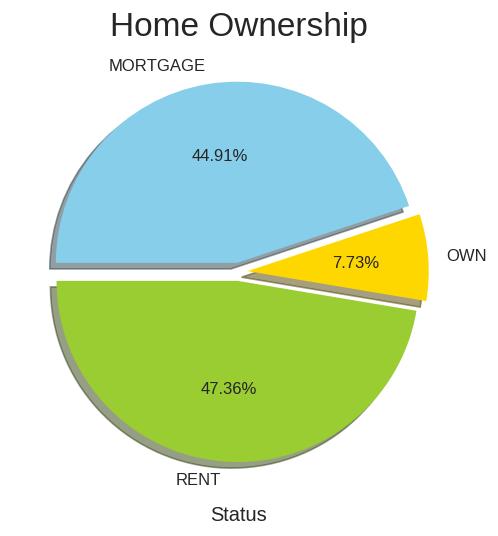

In [16]:
# ['home_ownership']
ownership_status = [(loan_df['home_ownership'] == 'RENT').sum(),
                      (loan_df['home_ownership'] == 'OWN').sum(),
                      (loan_df['home_ownership'] == 'MORTGAGE').sum()]

plt.figure(figsize=(5,5),dpi=120)
plt.pie(ownership_status, labels = ('RENT','OWN', 'MORTGAGE'), 
        explode = (0.05, 0.05, 0.05), colors = colors[-5:-2],shadow=True,startangle = 180, autopct='%1.2f%%')
plt.title("Home Ownership", fontsize = title_font)
plt.xlabel('Status',fontsize = xlabel_font)
plt.show()

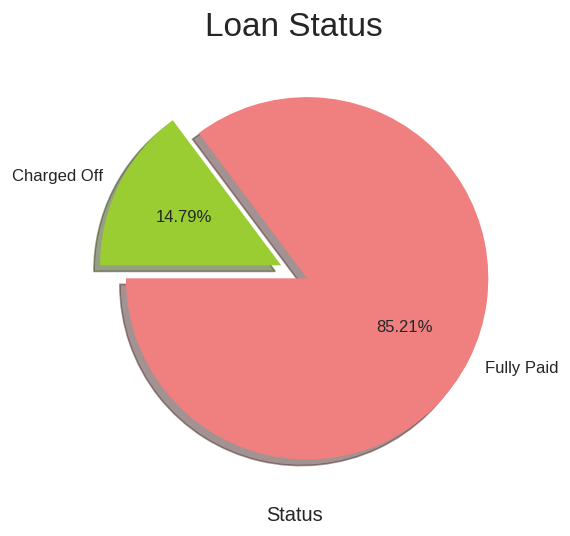

In [17]:
# ['loan_status'] -> DNMCP :- Does not meet the credit policy
loan_status = [(loan_df['loan_status'] == 'Fully Paid').sum(), (loan_df['loan_status'] == 'Charged Off').sum()]

plt.figure(figsize=(5,5),dpi=120) 
plt.pie(loan_status, labels = ('Fully Paid', 'Charged Off'), 
        explode = (0.08, 0.08), colors = colors[0:2],shadow=True,startangle = 180, autopct='%1.2f%%')
plt.title("Loan Status", fontsize = title_font)
plt.xlabel('Status',fontsize = xlabel_font)
plt.show()

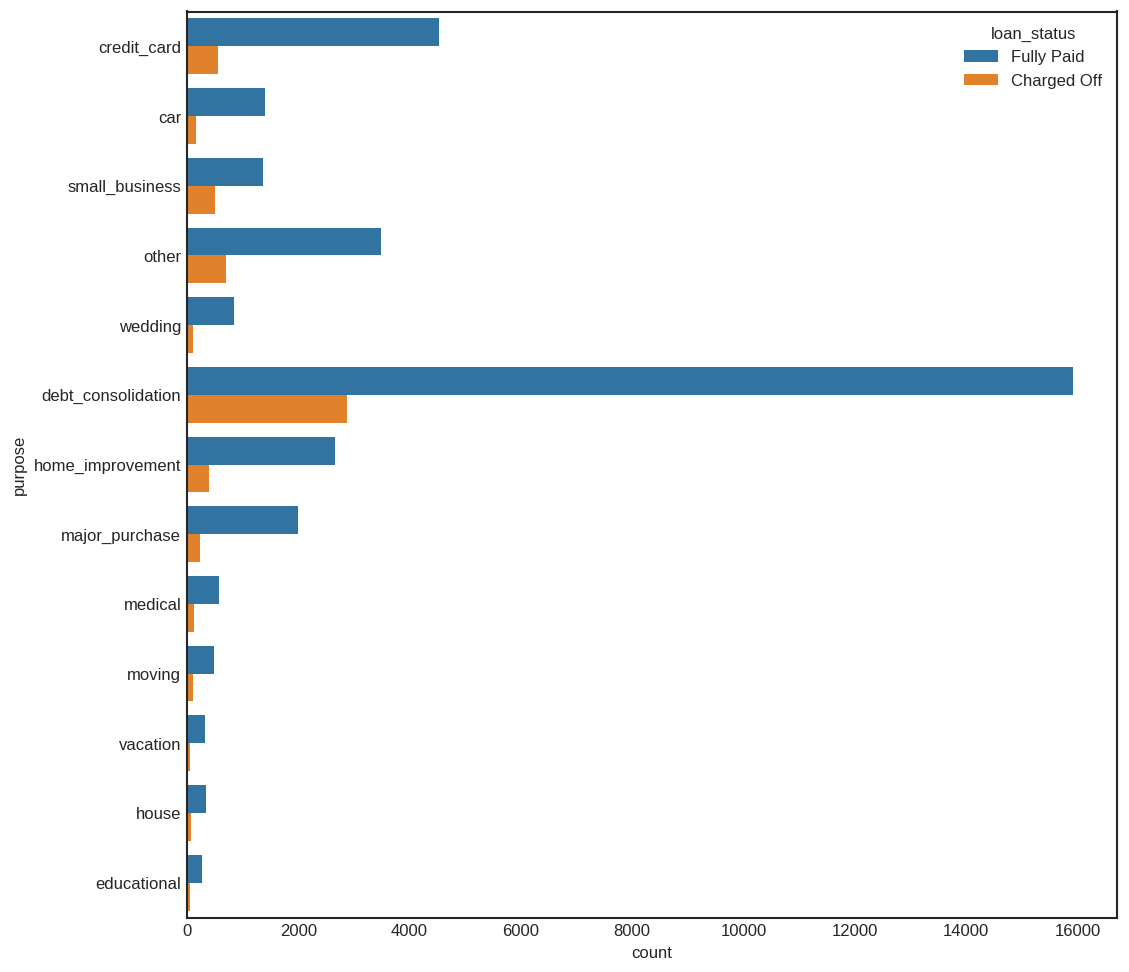

In [18]:
# ['purpose']
plt.figure(figsize=(10,10),dpi=120)
sns.countplot(y='purpose', data=loan_df ,hue='loan_status')
plt.show() 

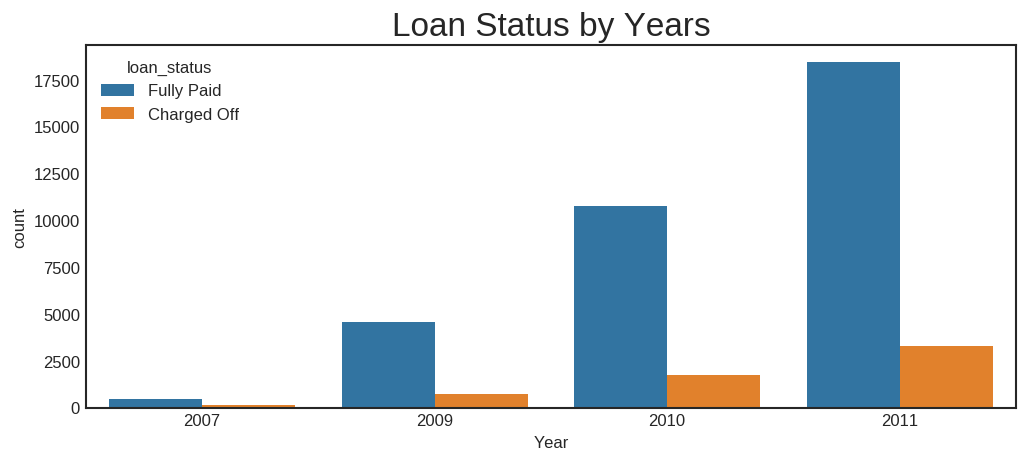

In [19]:
# ['loan_status']
plt.figure(figsize = (10,4), dpi=120)
sns.countplot(x='issue_yr', data=loan_df, hue='loan_status')
plt.xlabel('Year')
plt.title("Loan Status by Years", fontsize=title_font)
plt.show() 

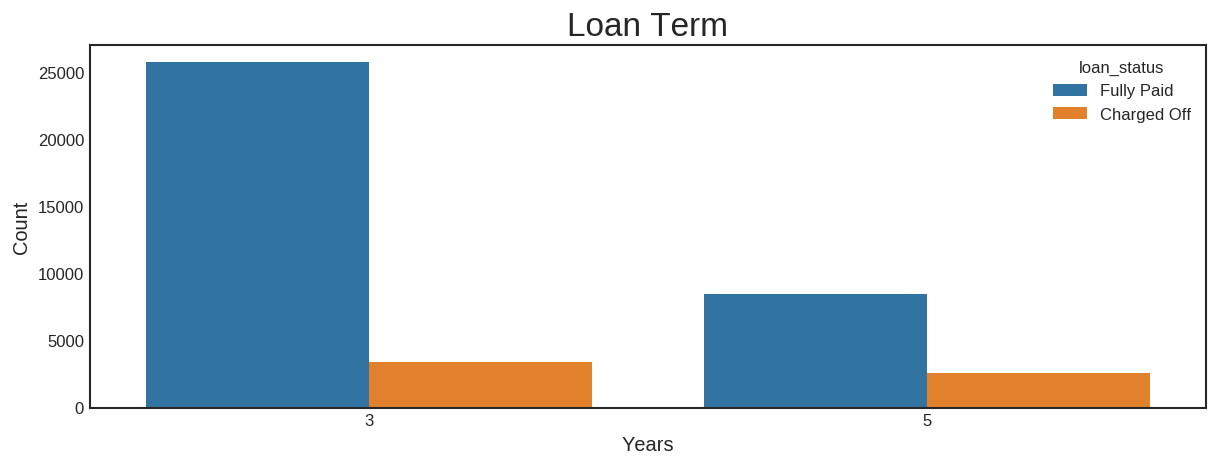

In [20]:
plt.figure(figsize = (12,4), dpi=120)
sns.countplot(x='term', data=loan_df, hue='loan_status')
plt.xlabel('Years',fontsize=xlabel_font)
plt.ylabel('Count',fontsize=ylabel_font)
plt.title('Loan Term', fontsize=title_font)
plt.show() 

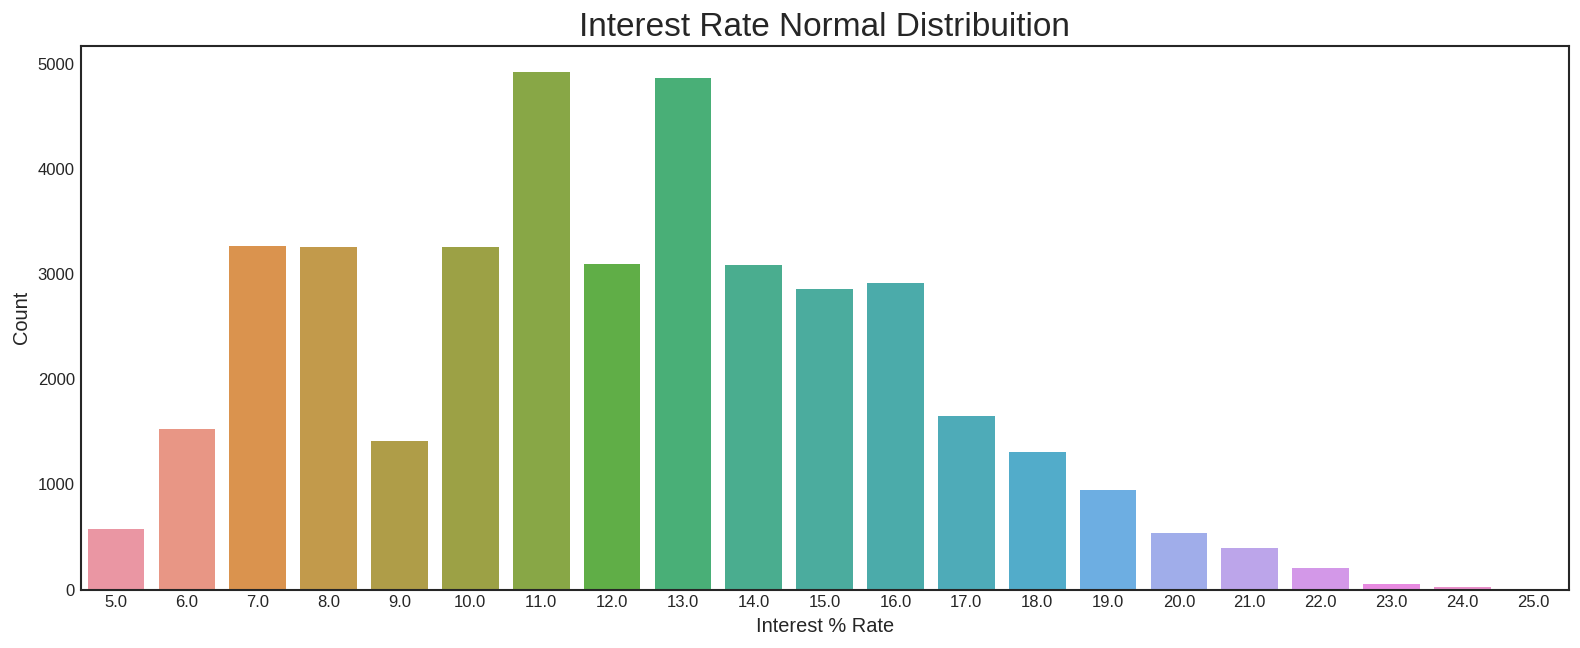

In [21]:
# Analyzing the "int_rate" column
plt.figure(figsize = (16,6), dpi=120)
sns.countplot(x = np.rint(loan_df['int_rate']),data=loan_df)
plt.xlabel("Interest % Rate", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Interest Rate Normal Distribuition", fontsize=20)
plt.show()

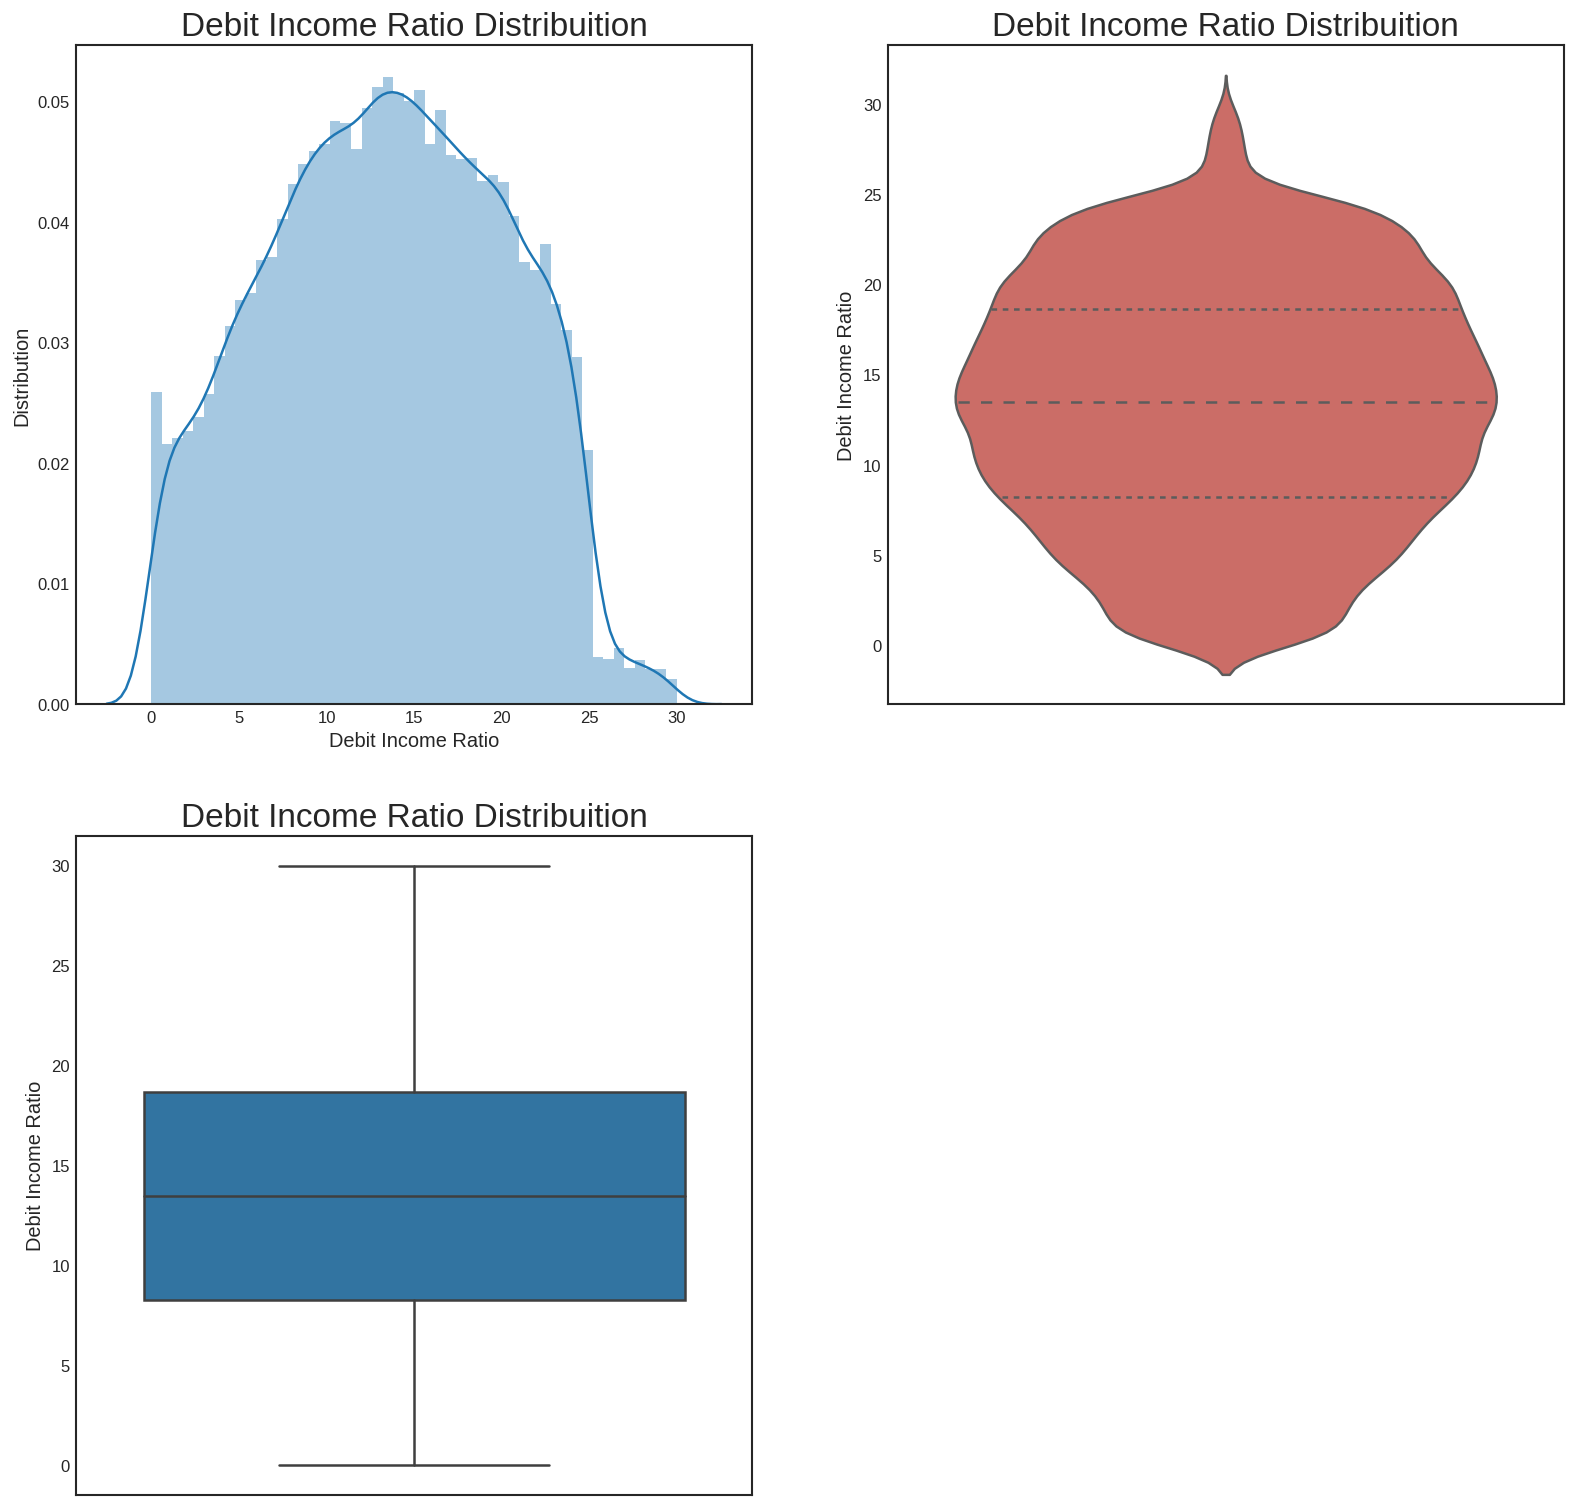

In [22]:
# Analyzing the "dti" column
plt.figure(figsize=(16,16), dpi=120)

plt.subplot(2,2,1)
g = sns.distplot(loan_df["dti"])
g.set_xlabel("Debit Income Ratio", fontsize = xlabel_font)
g.set_ylabel("Distribution", fontsize = xlabel_font)
g.set_title("Debit Income Ratio Distribuition", fontsize = title_font)

plt.subplot(2,2,2)
g1 = sns.violinplot(y="dti", data=loan_df, inner="quartile", palette="hls")
g1.set_xlabel("", fontsize = xlabel_font)
g1.set_ylabel("Debit Income Ratio", fontsize = ylabel_font)
g1.set_title("Debit Income Ratio Distribuition", fontsize= title_font)

plt.subplot(2,2,3)
g2 = sns.boxplot(x='dti', data=loan_df, orient='v')
g2.set_xlabel("", fontsize = xlabel_font)
g2.set_ylabel("Debit Income Ratio", fontsize = ylabel_font)
g2.set_title("Debit Income Ratio Distribuition", fontsize= title_font)

plt.show()

In [23]:
q = loan_df["loan_amnt"].quantile(0.9)
loan_df = loan_df[loan_df["loan_amnt"] < q] 
loan_df["loan_amnt"].describe()

count    36125.000000
mean      9424.796540
std       5278.907032
min        500.000000
25%       5000.000000
50%       8500.000000
75%      13000.000000
max      22125.000000
Name: loan_amnt, dtype: float64

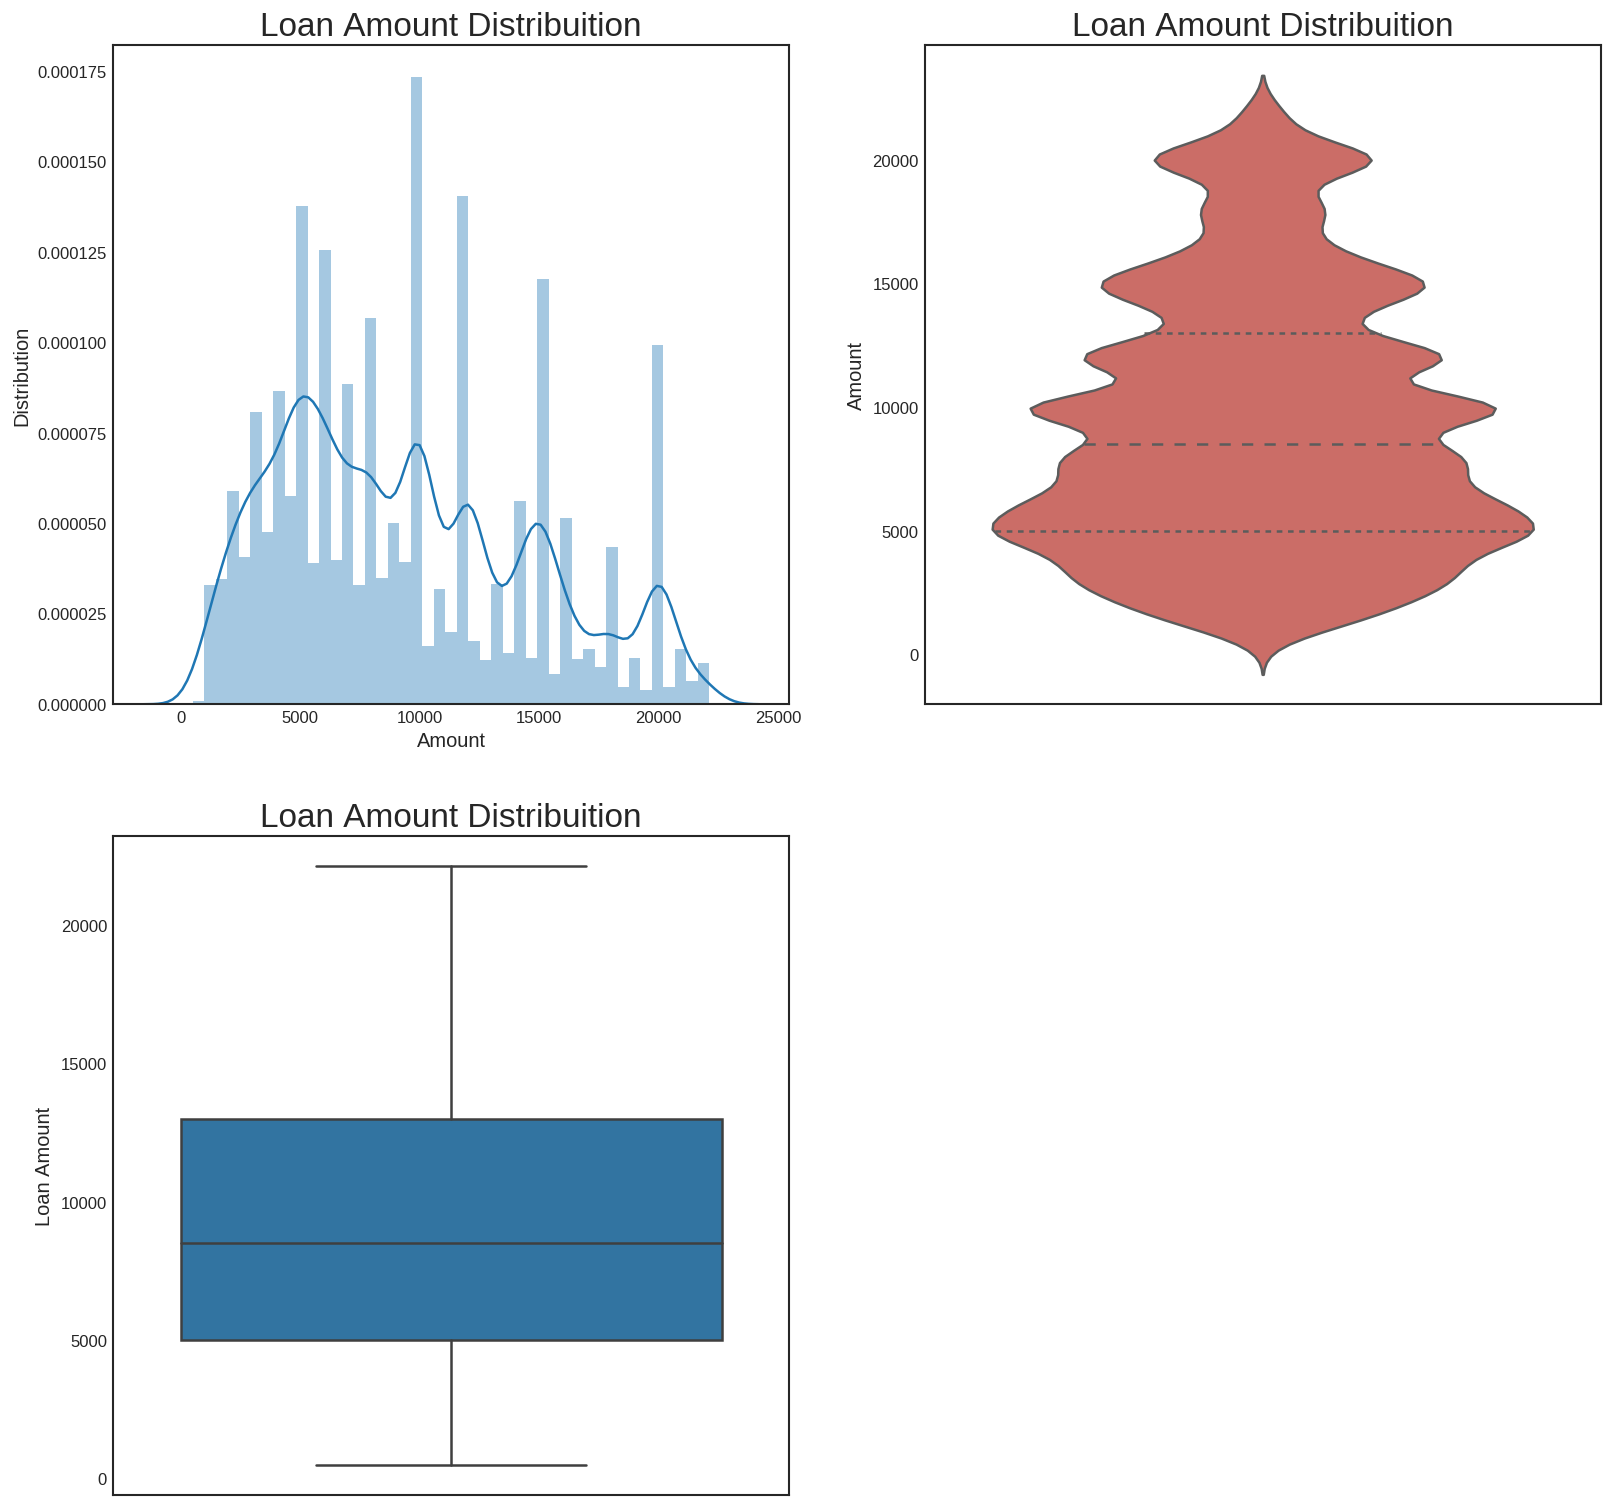

In [24]:
# Analyzing the "loan_amnt" column
plt.figure(figsize=(16,16), dpi=120)

plt.subplot(2,2,1)
g = sns.distplot(loan_df["loan_amnt"])
g.set_xlabel("Amount", fontsize = xlabel_font)
g.set_ylabel("Distribution", fontsize = xlabel_font)
g.set_title("Loan Amount Distribuition", fontsize = title_font)

plt.subplot(2,2,2)
g1 = sns.violinplot(y="loan_amnt", data=loan_df, inner="quartile", palette="hls")
g1.set_xlabel("", fontsize = xlabel_font)
g1.set_ylabel("Amount", fontsize = ylabel_font)
g1.set_title("Loan Amount Distribuition", fontsize= title_font)

plt.subplot(2,2,3)
g2 = sns.boxplot(x='loan_amnt', data=loan_df, orient='v')
g2.set_xlabel("", fontsize = xlabel_font)
g2.set_ylabel("Loan Amount", fontsize = ylabel_font)
g2.set_title("Loan Amount Distribuition", fontsize= title_font)

plt.show()

<br>Couldn't find any way to reduce outliers from the amount distribution. For this, binning has been done below.<br><br>

## Outlier Removal

In [25]:
loan_df = loan_df[loan_df['int_rate'] <= 22]
loan_df["int_rate"].describe()

count    36036.000000
mean        11.849166
std          3.607778
min          5.420000
25%          8.900000
50%         11.830000
75%         14.350000
max         21.820000
Name: int_rate, dtype: float64

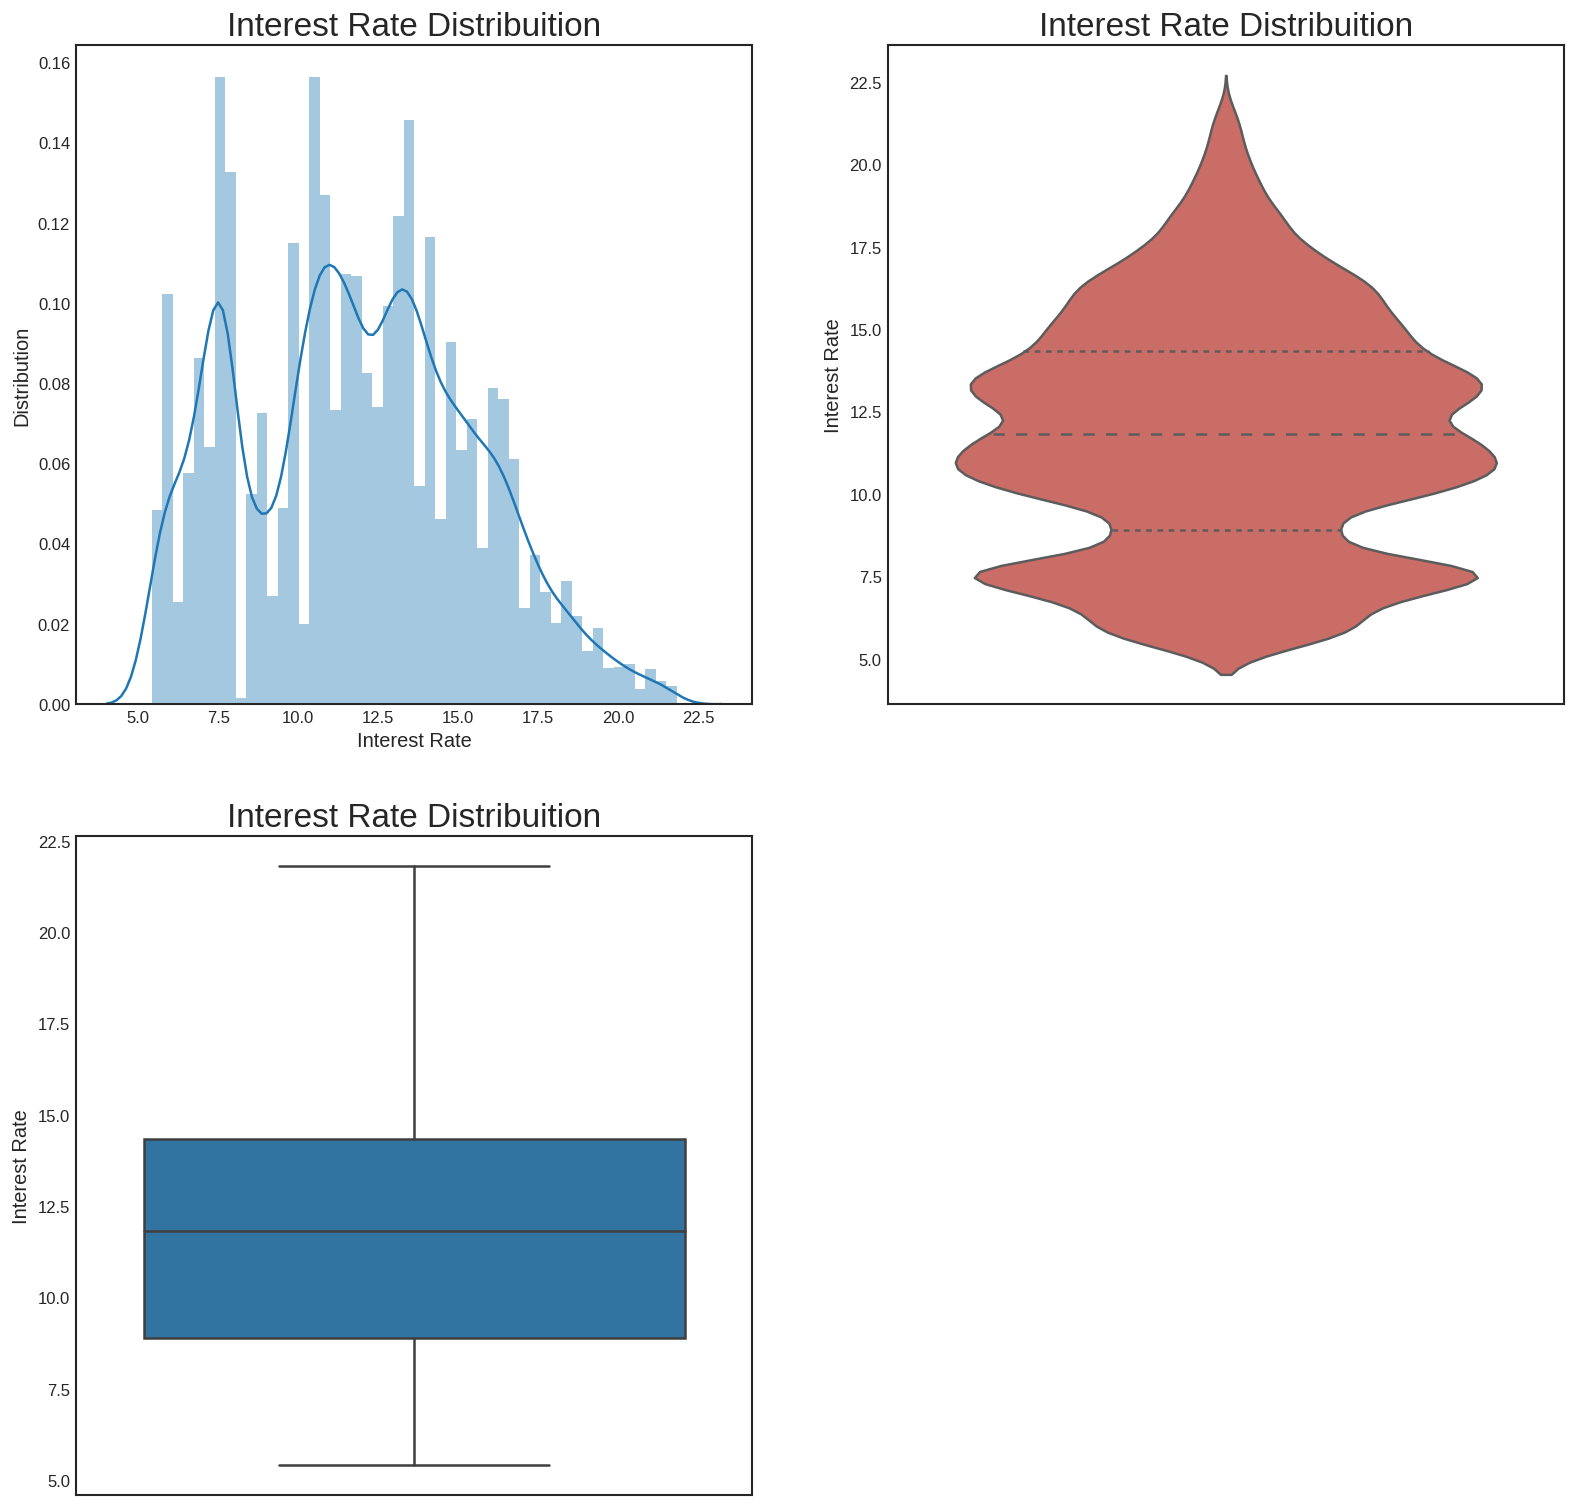

In [26]:
# Analyzing the "int_rate" column
plt.figure(figsize=(16,16), dpi=120)

plt.subplot(2,2,1)
g = sns.distplot(loan_df["int_rate"])
g.set_xlabel("Interest Rate", fontsize = xlabel_font)
g.set_ylabel("Distribution", fontsize = xlabel_font)
g.set_title("Interest Rate Distribuition", fontsize = title_font)

plt.subplot(2,2,2)
g1 = sns.violinplot(y="int_rate", data=loan_df, inner="quartile", palette="hls")
g1.set_xlabel("", fontsize = xlabel_font)
g1.set_ylabel("Interest Rate", fontsize = ylabel_font)
g1.set_title("Interest Rate Distribuition", fontsize= title_font)

plt.subplot(2,2,3)
g2 = sns.boxplot(x='int_rate', data=loan_df, orient='v')
g2.set_xlabel("", fontsize = xlabel_font)
g2.set_ylabel("Interest Rate", fontsize = ylabel_font)
g2.set_title("Interest Rate Distribuition", fontsize= title_font)

plt.show()

<br><br>Binning has also be done below for int_rate column<br>

### <br><br> Outliers Removal

In [27]:
q = loan_df["annual_inc"].quantile(0.948)
loan_df = loan_df[loan_df["annual_inc"] < q]
loan_df["annual_inc"].describe()

count     34158.000000
mean      57436.314188
std       25288.349828
min        1896.000000
25%       38400.000000
50%       54000.000000
75%       73000.000000
max      127741.000000
Name: annual_inc, dtype: float64

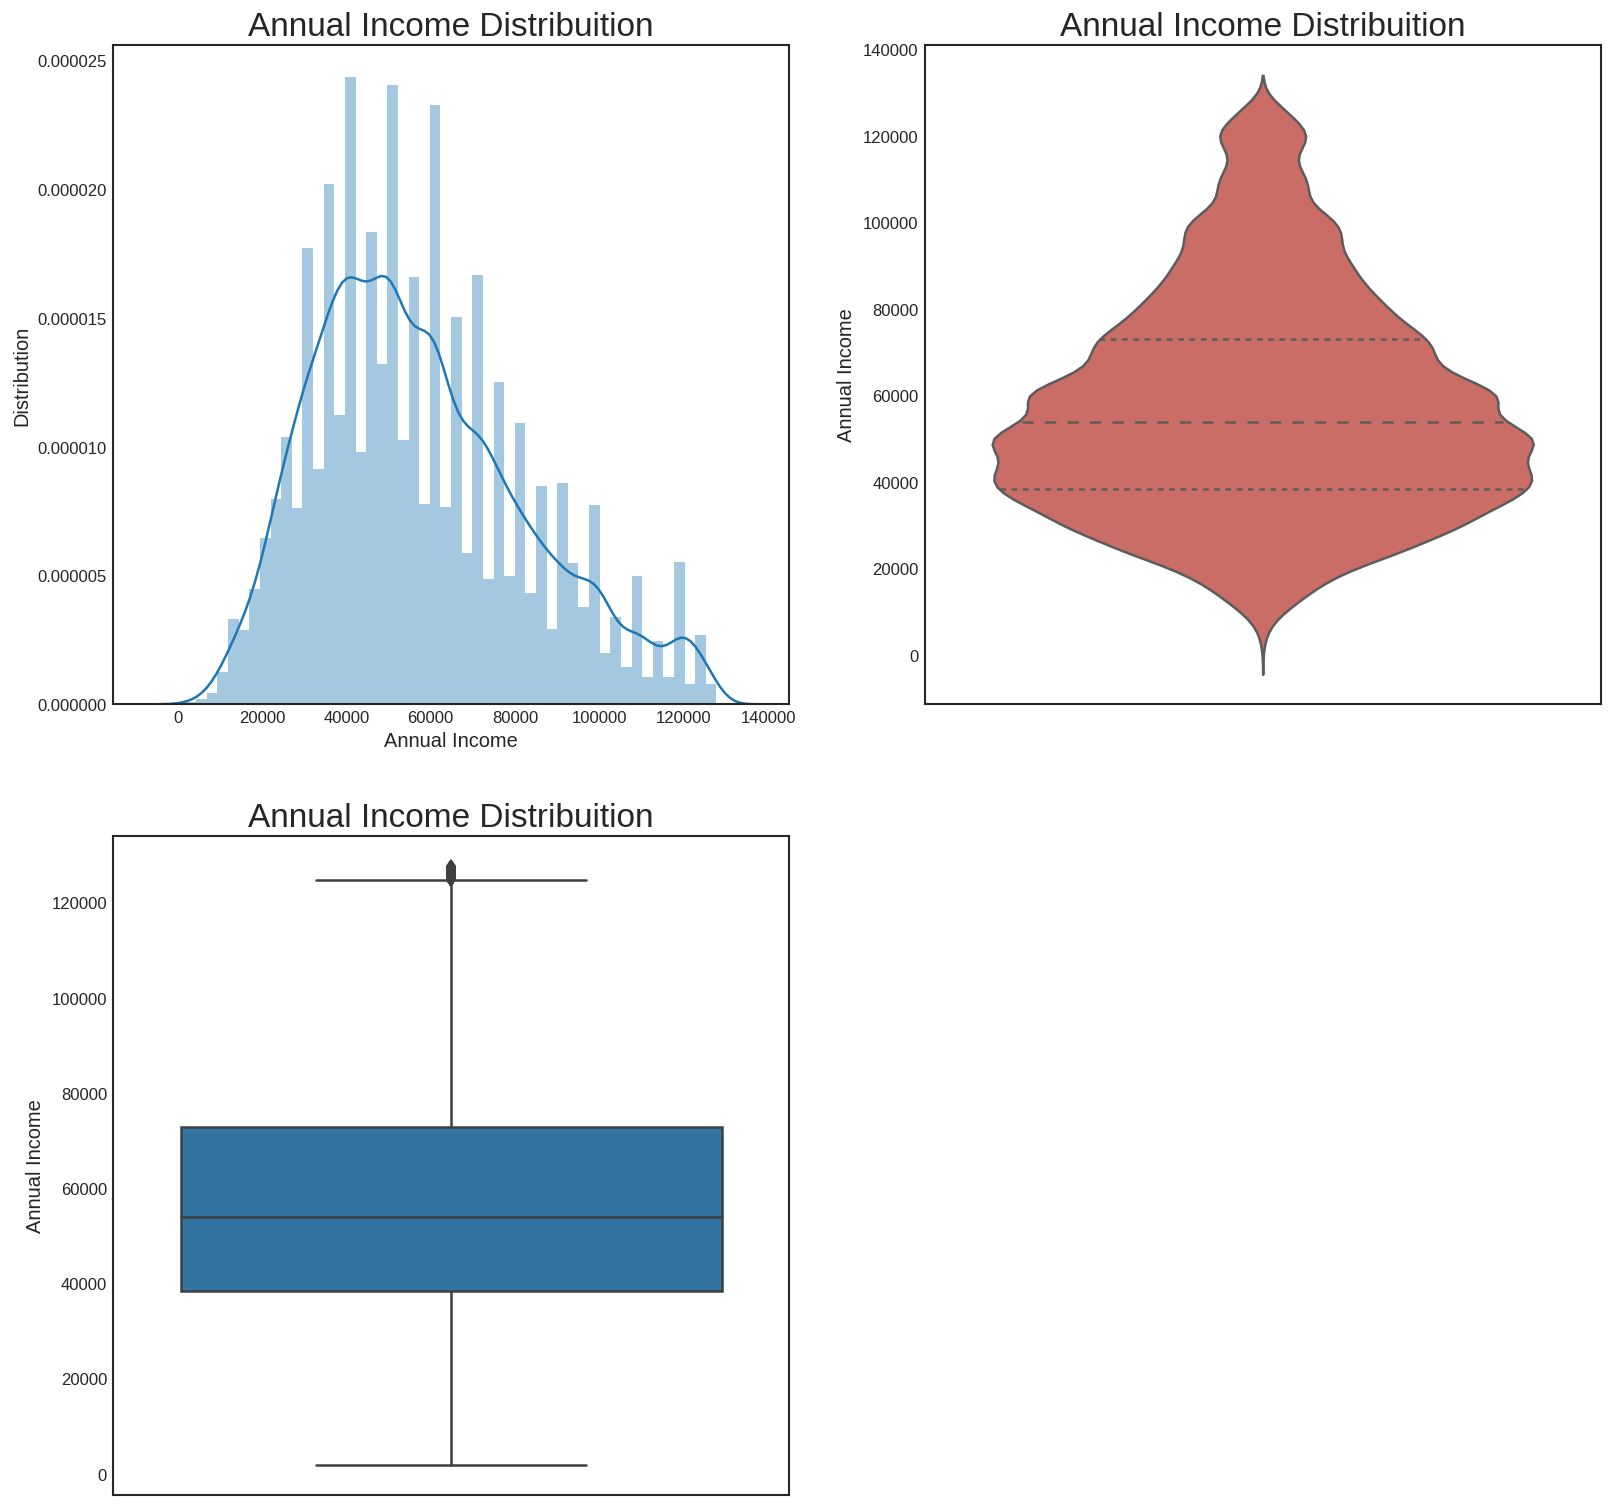

In [28]:
# Analyzing the "annual_inc" column
plt.figure(figsize=(16,16), dpi=120)

plt.subplot(2,2,1)
g = sns.distplot(loan_df["annual_inc"])
g.set_xlabel("Annual Income", fontsize = xlabel_font)
g.set_ylabel("Distribution", fontsize = xlabel_font)
g.set_title("Annual Income Distribuition", fontsize = title_font)

plt.subplot(2,2,2)
g1 = sns.violinplot(y="annual_inc", data=loan_df, inner="quartile", palette="hls")
g1.set_xlabel("", fontsize = xlabel_font)
g1.set_ylabel("Annual Income", fontsize = ylabel_font)
g1.set_title("Annual Income Distribuition", fontsize= title_font)

plt.subplot(2,2,3)
g2 = sns.boxplot(x='annual_inc', data=loan_df, orient='v')
g2.set_xlabel("", fontsize = xlabel_font)
g2.set_ylabel("Annual Income", fontsize = ylabel_font)
g2.set_title("Annual Income Distribuition", fontsize= title_font)

plt.show()

## <br><br><br>Bivariate Analysis

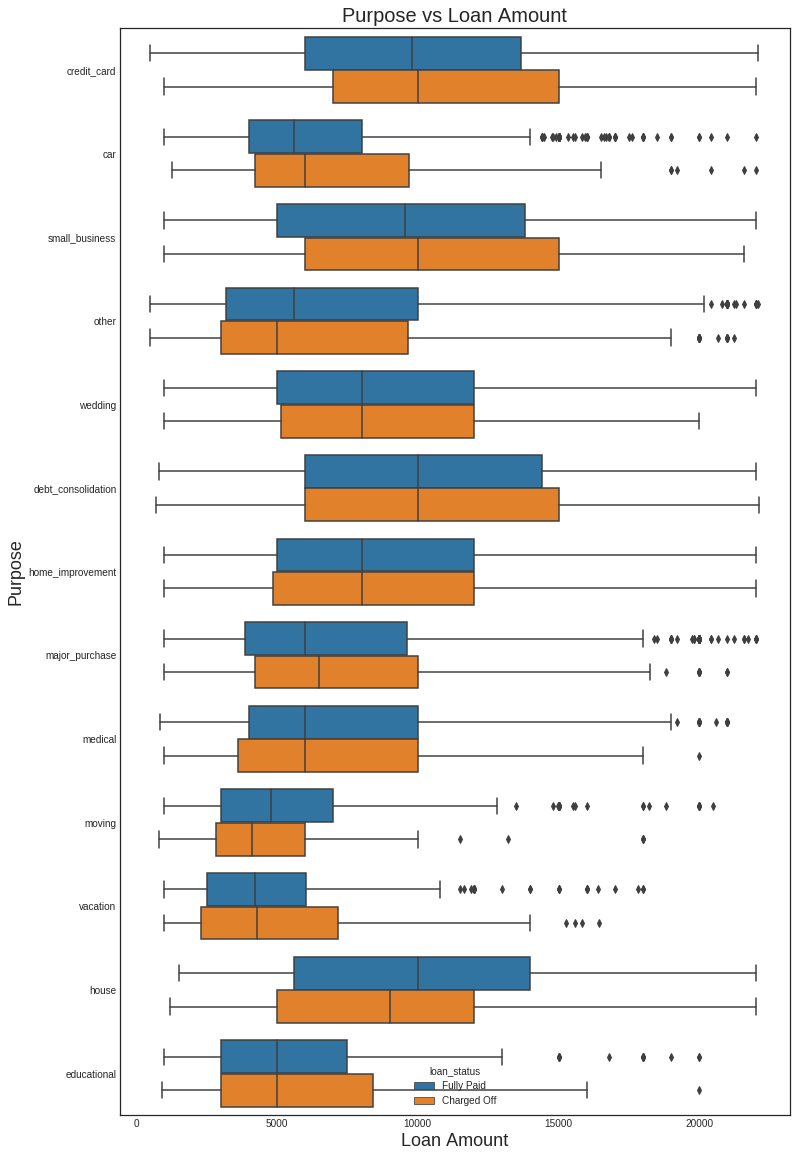

In [29]:
plt.figure(figsize=(12,20))
sns.boxplot(data =loan_df, y='purpose', x='loan_amnt', hue ='loan_status')
plt.xlabel('Loan Amount',fontsize=xlabel_font+6)
plt.ylabel('Purpose',fontsize=ylabel_font+6)
plt.title('Purpose vs Loan Amount',fontsize=title_font)
plt.show()

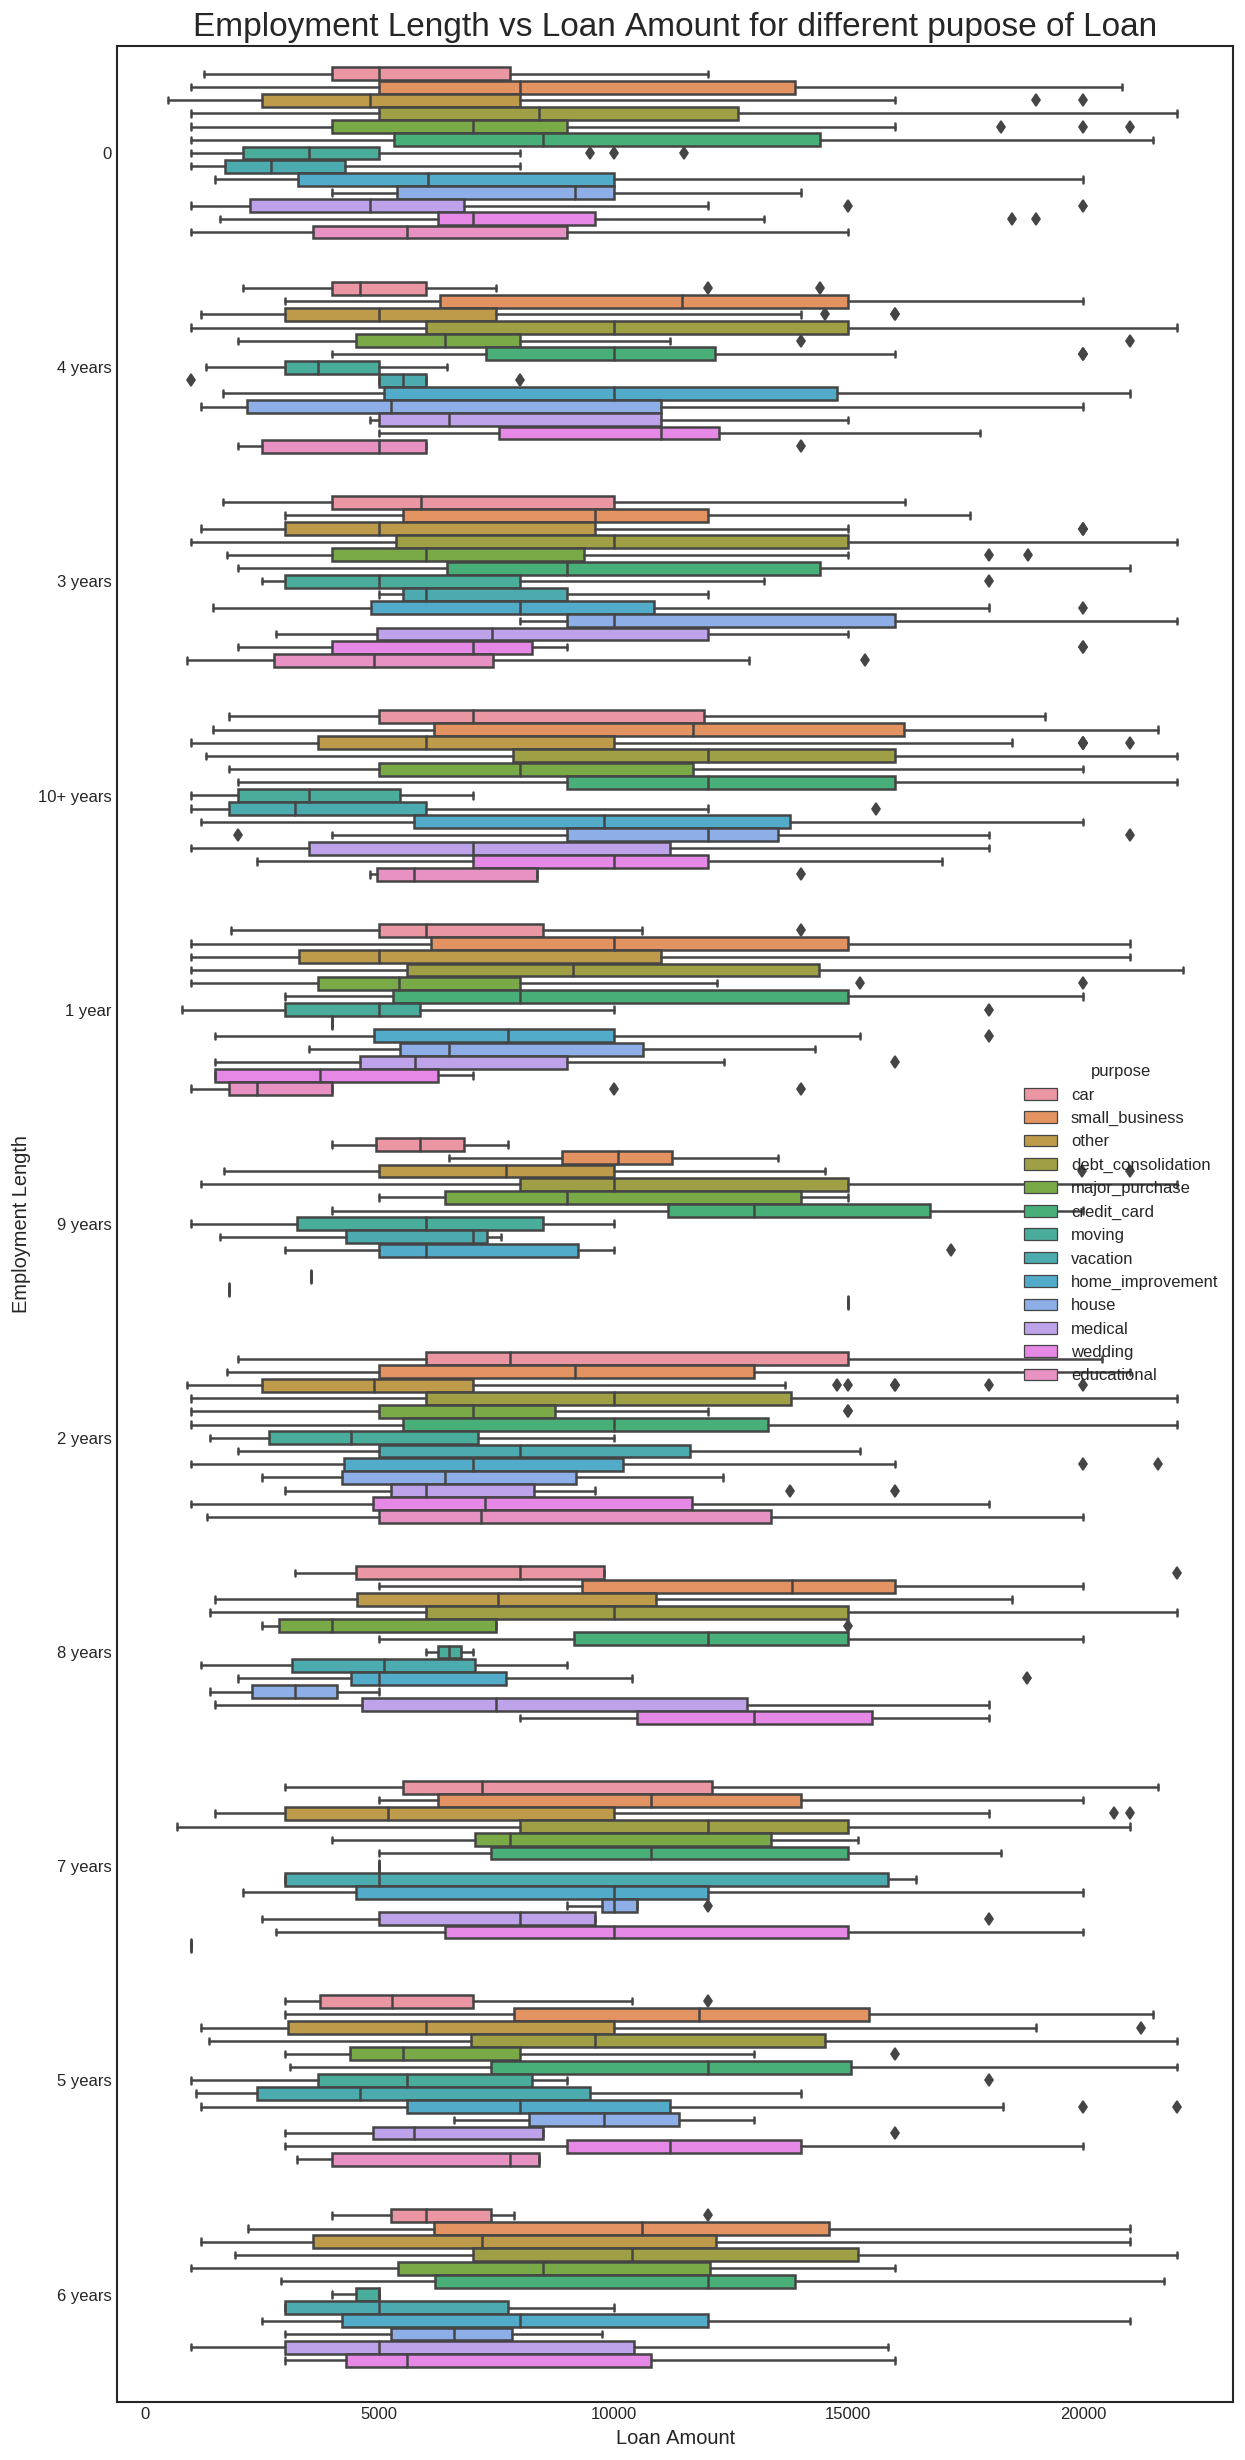

In [30]:
# ['Employment Length vs Loan Amount']

loanstatus=loan_df.pivot_table(index=['loan_status','purpose','emp_length'],values='loan_amnt',
                               aggfunc=('count')).reset_index()

loanstatus=loan_df.loc[loan_df['loan_status']=='Charged Off']

plt.figure(figsize=(12, 26),dpi=120)
sns.boxplot(y='emp_length', x='loan_amnt', hue='purpose', data=loanstatus)
plt.title('Employment Length vs Loan Amount for different pupose of Loan',fontsize=title_font)
plt.ylabel('Employment Length',fontsize=xlabel_font)
plt.xlabel('Loan Amount',fontsize=ylabel_font)
plt.show()

# Correlation

<Figure size 1920x1920 with 0 Axes>

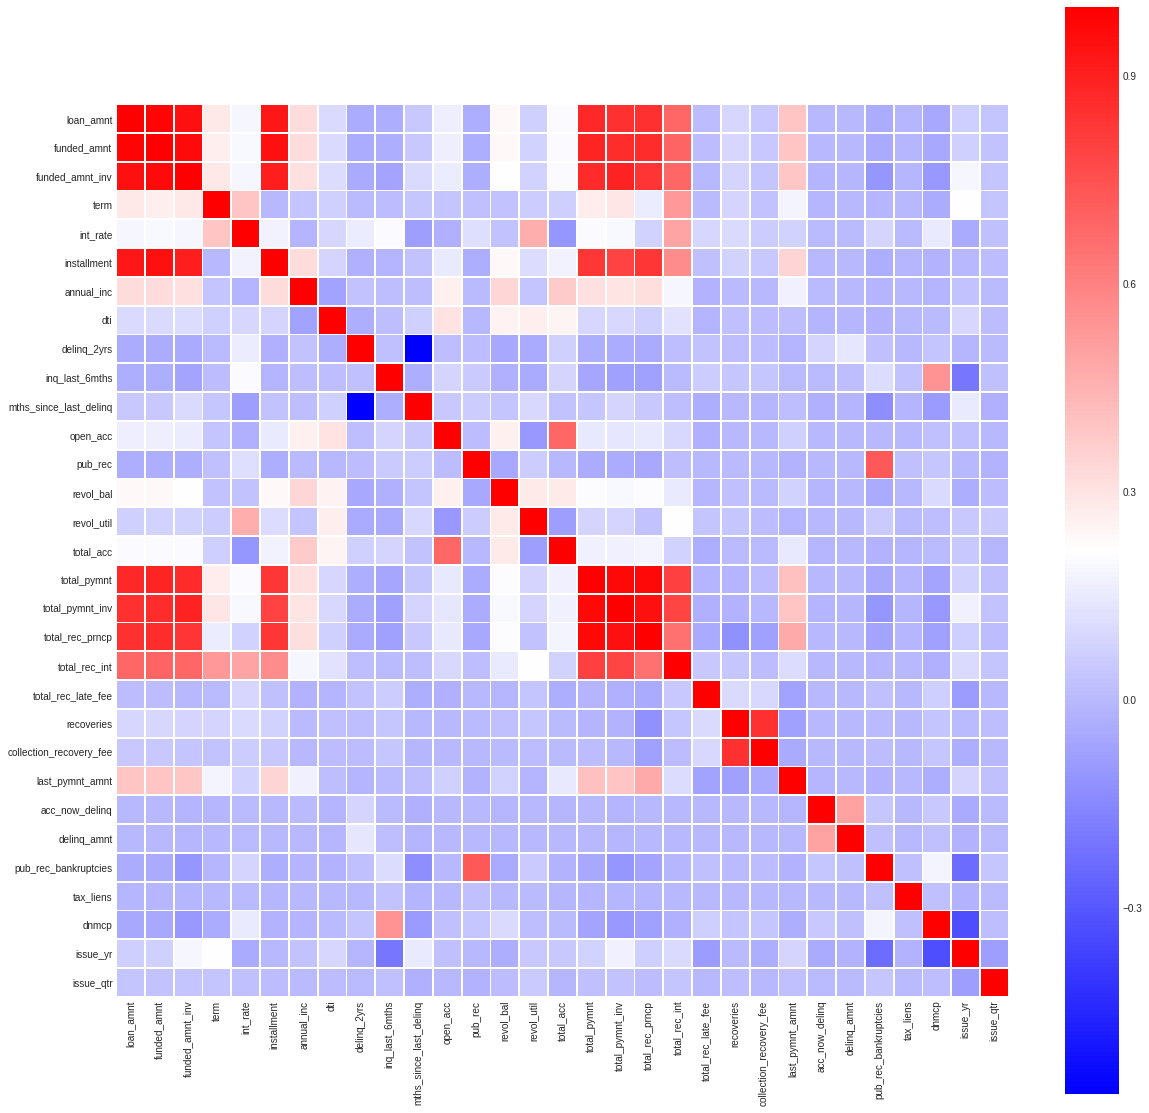

In [31]:
plt.figure(figsize=(16,16),dpi=120)
plt.figure(figsize=(20,20))
sns.set_context(font_scale=2)
sns.heatmap(loan_df.corr(), annot=False, cmap='bwr', square=True, linewidths=0.8)
plt.show()

In [32]:
# plot = sns.pairplot(loan_df, kind='reg')
# plot.savefig('./pairplot.png')

# Pairplot
![title](./pairplot-1.png)

## Binning

In [33]:
# ['dti']
bins = [0, 5, 10, 15, 20, 30]
slot = ['0-5', '5-10', '10-15', '15-20', '20 and above']
loan_df['dti_range'] = pd.cut(loan_df['dti'], bins, labels=slot)
test_2008['dti_range'] = pd.cut(test_2008['dti'], bins, labels=slot)

# ['loan_amnt']
bins = [0, 5000, 10000, 15000, 20000, 25000 ,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan_df['loan_amnt_range'] = pd.cut(loan_df['loan_amnt'], bins, labels=slot)
test_2008['loan_amnt_range'] = pd.cut(test_2008['loan_amnt'], bins, labels=slot)

# ['annual_inc']
bins = [0, 25000, 50000, 75000, 100000, 1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan_df['annual_inc_range'] = pd.cut(loan_df['annual_inc'], bins, labels=slot)
test_2008['annual_inc_range'] = pd.cut(test_2008['annual_inc'], bins, labels=slot)

# ['int_rate']
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loan_df['int_rate_range'] = pd.cut(loan_df['int_rate'], bins, labels=slot)
test_2008['int_rate_range'] = pd.cut(test_2008['int_rate'], bins, labels=slot)

##  Conclusion from Visualization
#### Target Variable

    Loan Status

#### Major variables to consider for loan prediction:

    Loan Amount
    Purpose of Loan
    Employment Length
    Grade
    Interest Rate
    Term
    Annual Income
    Debit to Income Ratio(dti)
    Verification Status
    Home Ownership
    Does Not Meet Credit Policy


# <br><br><br> Model Building

    Model 1 - Logistic Regression
    Model 2 - Naive Bayes Classifier
    Model 3 - Random Forest Classifier
    Model 4 - K Nearest Neighbour Classifier
    Model 5 - Ensemble Voting Classifier

The model must be trained and tested with a 10-fold CV<br>
Once the model has been trained it must be tested against data from 2008 Q1 to Q4 

In [34]:
cols = ['loan_amnt_range','purpose','emp_length','grade','int_rate_range','term','annual_inc_range',
        'loan_status','dti', 'verification_status','home_ownership', 'dnmcp'] 

In [35]:
# test_2008 = loan_df[loan_df.issue_yr == 2008] 
test_2008_df = test_2008[cols]
train_test_data = loan_df[loan_df.issue_yr != 2008]  
df = train_test_data[cols] 

In [36]:
new_df = df.assign(
    loan_amnt_range = df.loan_amnt_range.astype('category').cat.codes,
    purpose = df.purpose.astype('category').cat.codes,
    emp_length = df.emp_length.astype('category').cat.codes,
    grade = df.grade.astype('category').cat.codes,
    int_rate_range = df.int_rate_range.astype('category').cat.codes,
    term = df.term.astype('category').cat.codes,
    annual_inc_range = df.annual_inc_range.astype('category').cat.codes,
    home_ownership = df.home_ownership.astype('category').cat.codes,
    verification_status = df.verification_status.astype('category').cat.codes
)

In [37]:
del loan_df
del df 

In [38]:
# Train-test split
X = new_df.drop(['loan_status'],axis=1)
X = preprocessing.normalize(X)
y = new_df['loan_status']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 42) 

### Models Training and Testing

Instead of using K-Fold, I am using cross_val_score() for 10-fold CV

In [39]:
print("----------------------------Logistic Regression------------------------------")

l_model = LogisticRegression()
l_model.fit(X_train,y_train)
l_score = cross_val_score(l_model,X_train,y_train,cv=10)
y_pred = l_model.predict(X_test)

print(classification_report(y_pred,y_test))
print("\n\n Confusion Matrix\n")
print(confusion_matrix(y_pred,y_test))
print() 
print("Model Accuracy Avg: ", l_score.mean()*100)
print("Test Accuracy: ",accuracy_score(y_pred,y_test)*100)

----------------------------Logistic Regression------------------------------
              precision    recall  f1-score   support

 Charged Off       0.00      0.18      0.01        17
  Fully Paid       1.00      0.86      0.92      6815

   micro avg       0.85      0.85      0.85      6832
   macro avg       0.50      0.52      0.46      6832
weighted avg       1.00      0.85      0.92      6832



 Confusion Matrix

[[   3   14]
 [ 982 5833]]

Model Accuracy Avg:  85.43877218276864
Test Accuracy:  85.4215456674473


In [40]:
print("----------------------------Naive Bayes Classifier------------------------------")

nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
nb_score = cross_val_score(nb_model,X_train,y_train,cv=10)
y_pred = nb_model.predict(X_test)

print(classification_report(y_pred,y_test))
print("\n\n Confusion Matrix\n") 
print(confusion_matrix(y_pred,y_test))
print() 
print("Model Accuracy Avg: ", nb_score.mean()*100)
print("Test Accuracy: ",accuracy_score(y_pred,y_test)*100)

----------------------------Naive Bayes Classifier------------------------------
              precision    recall  f1-score   support

 Charged Off       0.14      0.27      0.18       515
  Fully Paid       0.94      0.87      0.90      6317

   micro avg       0.82      0.82      0.82      6832
   macro avg       0.54      0.57      0.54      6832
weighted avg       0.88      0.82      0.85      6832



 Confusion Matrix

[[ 137  378]
 [ 848 5469]]

Model Accuracy Avg:  82.298880034908
Test Accuracy:  82.05503512880561


In [41]:
print("----------------------------Random Forest Classifier------------------------------")

rf_model = RandomForestClassifier(n_estimators = 100, max_features = "auto", criterion = "gini",
                                  min_samples_leaf = 5,class_weight = "balanced") 
rf_model.fit(X_train,y_train)
rf_score = cross_val_score(rf_model,X_train,y_train,cv=10)
y_pred = rf_model.predict(X_test)

print(classification_report(y_pred,y_test))
print("\n\n Confusion Matrix\n") 
print(confusion_matrix(y_pred,y_test))
print() 
print("Model Accuracy Avg: ", rf_score.mean()*100)
print("Test Accuracy: ", accuracy_score(y_pred,y_test)*100)

----------------------------Random Forest Classifier------------------------------
              precision    recall  f1-score   support

 Charged Off       0.15      0.26      0.19       560
  Fully Paid       0.93      0.87      0.90      6272

   micro avg       0.82      0.82      0.82      6832
   macro avg       0.54      0.56      0.54      6832
weighted avg       0.86      0.82      0.84      6832



 Confusion Matrix

[[ 145  415]
 [ 840 5432]]

Model Accuracy Avg:  82.06469306610408
Test Accuracy:  81.63056206088993


In [42]:
print("----------------------------K Nearest Neighbour------------------------------")

knn_model = KNeighborsClassifier(n_neighbors=8)
knn_model.fit(X_train,y_train)
knn_score = cross_val_score(knn_model,X_train,y_train,cv=10)
y_pred = knn_model.predict(X_test)

print(classification_report(y_pred,y_test))
print("\n\n Confusion Matrix\n") 
print(confusion_matrix(y_pred,y_test))
print() 
print("Model Accuracy Avg: ", knn_score.mean()*100)
print("Test Score :", accuracy_score(y_pred,y_test)*100)

----------------------------K Nearest Neighbour------------------------------
              precision    recall  f1-score   support

 Charged Off       0.08      0.26      0.12       292
  Fully Paid       0.96      0.86      0.91      6540

   micro avg       0.84      0.84      0.84      6832
   macro avg       0.52      0.56      0.51      6832
weighted avg       0.92      0.84      0.88      6832



 Confusion Matrix

[[  75  217]
 [ 910 5630]]

Model Accuracy Avg:  83.60174177157006
Test Score : 83.50409836065575


In [43]:
print("----------------------------Ensemble Voting Classifier------------------------------")
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial',random_state=2) 
nb = GaussianNB() 
rf = RandomForestClassifier(n_estimators = 100, max_features = "auto", criterion = "gini",
                            min_samples_leaf = 4,class_weight = "balanced") 
knn = KNeighborsClassifier(n_neighbors=8)  

evc = VotingClassifier(estimators=[('lr',lr),('nb',nb),('rf',rf),('knn',knn)], voting='hard', n_jobs=10)
evc.fit(X_train,y_train)
evc_score = cross_val_score(evc,X,y,cv=10)
y_pred = evc.predict(X_test)

print(classification_report(y_pred,y_test))
print("\n\n Confusion Matrix\n") 
print(confusion_matrix(y_pred,y_test))
print() 
print("Model Accuracy Avg: ", evc_score.mean()*100)
print("Test Score :", accuracy_score(y_pred,y_test)*100)

----------------------------Ensemble Voting Classifier------------------------------
              precision    recall  f1-score   support

 Charged Off       0.08      0.30      0.12       245
  Fully Paid       0.97      0.86      0.91      6587

   micro avg       0.84      0.84      0.84      6832
   macro avg       0.52      0.58      0.52      6832
weighted avg       0.94      0.84      0.88      6832



 Confusion Matrix

[[  74  171]
 [ 911 5676]]

Model Accuracy Avg:  84.52482966525636
Test Score : 84.16276346604215


# <br><br><br> Testing models against data for year 2008 from Quarters 1 to 4 

In [44]:
test_2008_df = test_2008_df.assign(
    loan_amnt_range = test_2008_df.loan_amnt_range.astype('category').cat.codes,
    purpose = test_2008_df.purpose.astype('category').cat.codes,
    emp_length = test_2008_df.emp_length.astype('category').cat.codes,
    grade = test_2008_df.grade.astype('category').cat.codes,
    int_rate_range = test_2008_df.int_rate_range.astype('category').cat.codes,
    term = test_2008_df.term.astype('category').cat.codes,
    annual_inc_range = test_2008_df.annual_inc_range.astype('category').cat.codes,
    home_ownership = test_2008_df.home_ownership.astype('category').cat.codes,
    verification_status = test_2008_df.verification_status.astype('category').cat.codes
) 

test_q1 = test_2008_df[test_2008.issue_qtr == 1]
test_q2 = test_2008_df[test_2008.issue_qtr == 2]
test_q3 = test_2008_df[test_2008.issue_qtr == 3]
test_q4 = test_2008_df[test_2008.issue_qtr == 4]

In [45]:
lr_test_score = []
nb_test_score = []
rf_test_score = []
knn_test_score = []
evc_test_score = []

In [46]:
del test_2008_df

## Test for 2008 Quarter 1 

In [47]:
X = test_q1.drop(['loan_status'],axis=1)
X = preprocessing.normalize(X)
y = test_q1['loan_status']
print("Testing Data: ", test_q1.shape[0])

# Logistic Regression Model
y_pred =  cross_val_predict(l_model,X,y, cv=10)
acc = accuracy_score(y,y_pred)
lr_test_score.append(acc)
print("\nLogistic Regression : ", acc*100)

# Naive Bayes Model
y_pred =  cross_val_predict(nb_model,X,y, cv=10)
acc = accuracy_score(y,y_pred)
nb_test_score.append(acc)
print("Naive Bayes : ", acc*100)

# Random Forest Model
y_pred =  cross_val_predict(rf_model,X,y, cv=10)
acc = accuracy_score(y,y_pred)
rf_test_score.append(acc)
print("Random Forest: ", acc*100)

# kNN Model
y_pred =  cross_val_predict(rf_model,X,y, cv=10)
acc = accuracy_score(y,y_pred)
knn_test_score.append(acc)
print("KNN: ", acc*100)

# Voting Classifier 
y_pred =  cross_val_predict(evc,X,y, cv=10)
acc = accuracy_score(y,y_pred)
evc_test_score.append(acc)
print("EVC: ",acc*100)

Testing Data:  1013

Logistic Regression :  76.90029615004936
Naive Bayes :  70.38499506416585
Random Forest:  70.18756169792695
KNN:  69.8914116485686
EVC:  73.44521224086871


## Test for 2008 Quarter 2

In [48]:
X = test_q2.drop(['loan_status'],axis=1)
X = preprocessing.normalize(X)
y = test_q2['loan_status']
print("Testing Data: ", test_q2.shape[0])

# Logistic Regression Model
y_pred =  cross_val_predict(l_model,X,y, cv=10)
acc = accuracy_score(y,y_pred)
lr_test_score.append(acc)
print("\nLogistic Regression : ", acc*100)

# Naive Bayes Model
y_pred =  cross_val_predict(nb_model,X,y, cv=10)
acc = accuracy_score(y,y_pred)
nb_test_score.append(acc)
print("Naive Bayes : ", acc*100)

# Random Forest Model
y_pred =  cross_val_predict(rf_model,X,y, cv=10)
acc = accuracy_score(y,y_pred)
rf_test_score.append(acc)
print("Random Forest: ",acc*100)

# kNN Model
y_pred =  cross_val_predict(rf_model,X,y, cv=10)
acc = accuracy_score(y,y_pred)
knn_test_score.append(acc)
print("KNN: ",acc*100)

# Voting Classifier
y_pred =  cross_val_predict(evc,X,y, cv=10)
acc = accuracy_score(y,y_pred)
evc_test_score.append(acc)
print("EVC: ",acc*100)

Testing Data:  498

Logistic Regression :  77.91164658634538
Naive Bayes :  63.25301204819277
Random Forest:  68.47389558232932
KNN:  68.27309236947792
EVC:  70.28112449799197


## Test for 2008 Quarter 3

In [49]:
X = test_q3.drop(['loan_status'],axis=1)
X = preprocessing.normalize(X)
y = test_q3['loan_status']
print("Testing Data: ", test_q3.shape[0])

# Logistic Regression Model
y_pred =  cross_val_predict(l_model,X,y, cv=10)
acc = accuracy_score(y,y_pred)
lr_test_score.append(acc)
print("\nLogisitc Regression : ", acc*100)

# Naive Bayes Model
y_pred =  cross_val_predict(nb_model,X,y, cv=10)
acc = accuracy_score(y,y_pred)
nb_test_score.append(acc)
print("Naive Bayes : ", acc*100)

# Random Forest Model
y_pred =  cross_val_predict(rf_model,X,y, cv=10)
acc = accuracy_score(y,y_pred)
rf_test_score.append(acc)
print("Random Forest: ", acc*100)

# kNN Model
y_pred =  cross_val_predict(rf_model,X,y, cv=10)
acc = accuracy_score(y,y_pred)
knn_test_score.append(acc)
print("KNN: ", acc*100)

# Voting Classifier
y_pred =  cross_val_predict(evc,X,y, cv=10)
acc = accuracy_score(y,y_pred)
evc_test_score.append(acc)
print("EVC: ", acc*100)

Testing Data:  298

Logisitc Regression :  82.5503355704698
Naive Bayes :  77.85234899328859
Random Forest:  77.51677852348993
KNN:  77.85234899328859
EVC:  80.87248322147651


## Test for 2008 Quarter 4

In [50]:
X = test_q3.drop(['loan_status'],axis=1)
X = preprocessing.normalize(X)
y = test_q3['loan_status']
print("Testing Data : ", test_q4.shape[0])

# Logistic Regression Model
y_pred =  cross_val_predict(l_model,X,y, cv=10)
acc = accuracy_score(y,y_pred)
lr_test_score.append(acc)
print("\nLogistic Regression : ", acc*100)

# Naive Bayes Model
y_pred =  cross_val_predict(nb_model,X,y, cv=10)
acc = accuracy_score(y,y_pred)
nb_test_score.append(acc)
print("Naive Bayes : ", acc*100)

# Random Forest Model
y_pred =  cross_val_predict(rf_model,X,y, cv=10)
acc = accuracy_score(y,y_pred)
rf_test_score.append(acc)
print("Random Forest: ", acc*100)

# kNN Model
y_pred =  cross_val_predict(rf_model,X,y, cv=10)
acc = accuracy_score(y,y_pred)
knn_test_score.append(acc)
print("KNN: ", acc*100)

# Voting Classifier
y_pred =  cross_val_predict(evc,X,y, cv=10)
acc = accuracy_score(y,y_pred)
evc_test_score.append(acc)
print("EVC: ", acc*100)

Testing Data :  584

Logistic Regression :  82.5503355704698
Naive Bayes :  77.85234899328859
Random Forest:  78.52348993288591
KNN:  78.85906040268456
EVC:  80.53691275167785


In [51]:
def avg_total(lst):
    return round((sum(lst)/len(lst))*100, 2)

print('\n------------Overall Test Accucary------------\n')
print('Logistic Regression: ', avg_total(lr_test_score))
print('Naive bayes: ', avg_total(nb_test_score))
print('Random Forest: ', avg_total(rf_test_score))
print('K-Nearest Neighbour: ', avg_total(knn_test_score))
print('Ensemble Voting Classifier: ', avg_total(evc_test_score))


------------Overall Test Accucary------------

Logistic Regression:  79.98
Naive bayes:  72.34
Random Forest:  73.68
K-Nearest Neighbour:  73.72
Ensemble Voting Classifier:  76.28


# <br><br><br> Conclusion

Logistic Regression and Ensemble Voting Classifier are more accurate among the five models. Logistic Regression is the winner.

More analysis, model hyperparameter tuining & outliers removal is needed to improve the model accuracy.